<a href="https://colab.research.google.com/github/genadidharma/pengolahan-citra-dan-visi-komputer/blob/main/Week%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

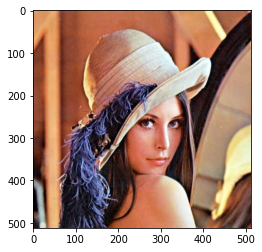

In [3]:
# display & convert image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 6/Source/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

# Praktikum

1. Membuat Histogram Warna

<BarContainer object of 256 artists>

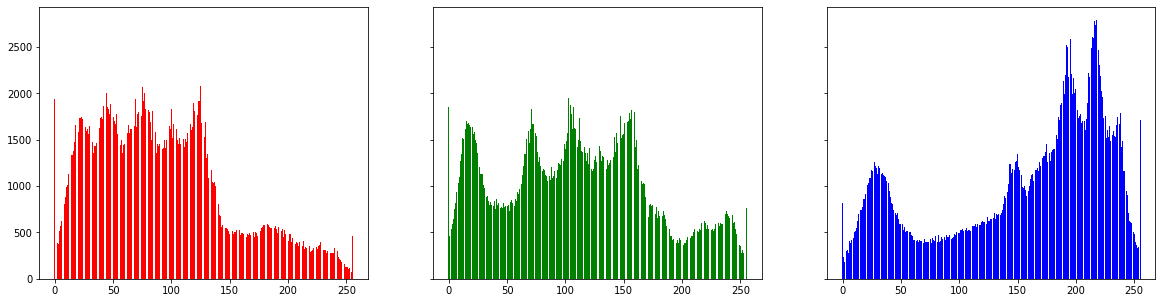

In [4]:
# create bar histogram
#source: https://github.com/rezarinaldi

# make shape of the image
height, width, depth = np.shape(img)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    # count every same color value from 0-255
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

# plot the result
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

In [5]:
# summing each color channel pixel amount
# source: https://www.geeksforgeeks.org/opencv-counting-the-number-of-black-and-white-pixels-in-the-image/

red_px_sum = np.sum(img == (255,0,0)) # summing all red channel
green_px_sum = np.sum(img == (0,255,0)) # summing all green channel
green_px_sum = np.sum(img == (0,0,255)) # summing all blue channel

print("Pixels for each color channels are - Red: {}, Green: {}, Blue: {}".format(red_px_sum, green_px_sum, green_px_sum))

Pixels for each color channels are - Red: 5511, Green: 3140, Blue: 3140


2. Membuat Histogram Warna dengan `calcHist`

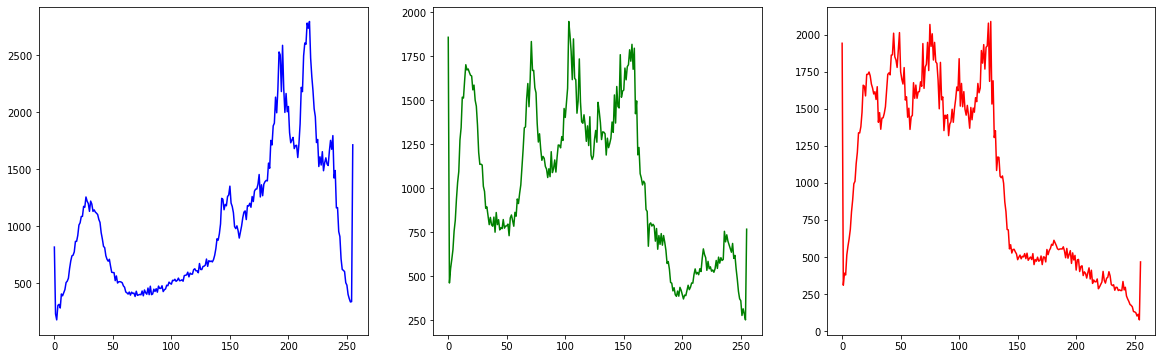

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(20,20))

# loop through each color channel, calculate the histograms and plot them
color = ('b','g','r')
for i, col in enumerate(color):
  histogram = cv.calcHist([img],[i],None,[256],[0,256])
  ax[i].plot(histogram, color=col)

  # create 1:1 aspect ratio for each subplots
  ratio = 1.0
  x_left, x_right = ax[i].get_xlim()
  y_low, y_high = ax[i].get_ylim()
  ax[i].set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
